# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [34]:
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import numpy as np

In [4]:
import matplotlib.pyplot as plt

Let us load the mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train)))

(60000, 28, 28)
pixel range is [0,255]


In [8]:
x_test.shape

(10000, 28, 28)

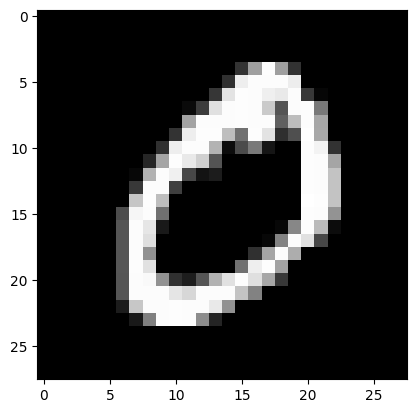

In [9]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

We normalize the input in the range [0,1]

In [21]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 2d -> 1d
x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

The output of the network will be a proability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [22]:
y_train.shape

(60000,)

In [23]:
print(y_train[0])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[0])
y_test_cat = utils.to_categorical(y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Our first Netwok just implements logistic regression

In [24]:
xin = Input(shape=(784))
res = Dense(10,activation='softmax')(xin)

mynet = Model(inputs=xin,outputs=res)

In [25]:
mynet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`None` is the batch dimension

Now we need to compile the network.
In order to do it, we need to pass two mandatory arguments:


*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
*   the **loss function**

Several predefined optimizers exist, and you should just choose your favourite one. A common choice is Adam, implementing an adaptive lerning rate, with momentum

Optionally, we can specify additional metrics, mostly meant for monitoring the training process.


in keras we compile the model and we specify:
- the loss 
- the optimizer

In [26]:
mynet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Finally, we fit the model over the trianing set. 

Fitting, just requires two arguments: training data e ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

* `epoch` how many times we pass on training data
* `batch_size` how many samples to process in parallel

In [28]:
mynet.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.2494 - accuracy: 0.9312 - val_loss: 0.2704 - val_accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.2479 - accuracy: 0.9320 - val_loss: 0.2680 - val_accuracy: 0.9249
Epoch 3/10
1875/1875 [==============================] - 1s 752us/step - loss: 0.2460 - accuracy: 0.9317 - val_loss: 0.2705 - val_accuracy: 0.9256
Epoch 4/10
1875/1875 [==============================] - 1s 746us/step - loss: 0.2453 - accuracy: 0.9319 - val_loss: 0.2663 - val_accuracy: 0.9255
Epoch 5/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.2437 - accuracy: 0.9326 - val_loss: 0.2690 - val_accuracy: 0.9264
Epoch 6/10
1875/1875 [==============================] - 1s 746us/step - loss: 0.2435 - accuracy: 0.9330 - val_loss: 0.2650 - val_accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.2425 - accuracy: 0.9326 - val_loss: 0.2666 -

In [35]:
xin = Input(shape=(784))
# x = Dense(128,activation='relu')(xin)
x = Dense(128)(xin)
x = Activation('relu')(x)
res = Dense(10,activation='softmax')(x)

mynet2 = Model(inputs=xin,outputs=res)

In [36]:
mynet2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
mynet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2572 - accuracy: 0.9274 - val_loss: 0.1392 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.9670 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0763 - accuracy: 0.9770 - val_loss: 0.0783 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0742 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0672 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0663 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0688 - val_accuracy:

An amazing improvement. WOW!

In [39]:
mynet2.save_weights('myfile')

In [40]:
mynet2.load_weights('myfile')

# Exercises

1.   Add additional Dense layers and check the performance of the network
2.   Replace 'relu' with different activation functions
3. Adapt the network to work with the so called sparse_categorical_crossentropy
4. the fit function return a history of training, with temporal sequences for all different metrics. Make a plot.

